In [52]:
import lightct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Define path to folder

In [11]:
save_folder = 'test'

## 2) Acquire projections...

(I'm going to attempt this by spinning on my chair!)

In [56]:
data = lightct.TomoScan(num_proj=50, folder=save_folder)

## 3) Check we have acquired images...

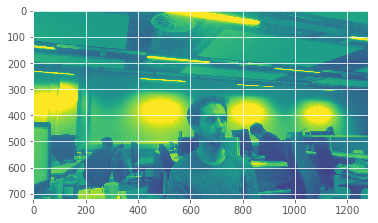

In [57]:
plt.figure()
plt.imshow(data.im_stack[:, :, 1])

## 4) Find number of projections in 360

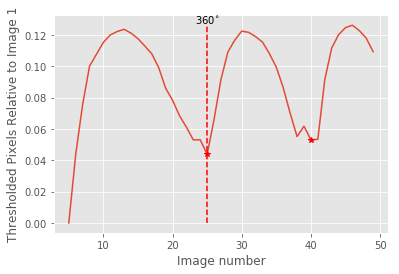


21 images in a 360 rotation.

If this is incorrect either rerun with a different value for est_nproj or use the manual method.


In [58]:
# Useful if you can estimate the correct projections in 360
est_nproj = 20
data.auto_set_angles(est_nproj)

## 4) Centre the images

This compares image at 0deg and 180 deg (flipped). The two images are shifted across each other and the centre is set where the difference between the two is minimised.

COR = 237


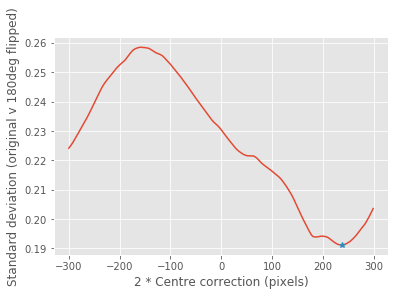

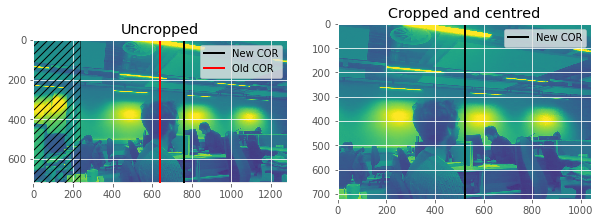

In [60]:
data.auto_centre(window=600)

## 5) Crop the image to minimise recon time

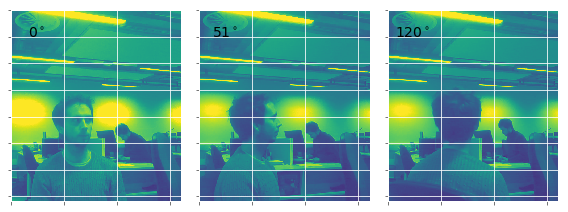

In [61]:
data.set_crop(width=200, top=0, bottom=0)

## 6) And reconstruct!

In [62]:
data.reconstruct(downsample=(2,2), median_filter=False)


Reconstructing...
Progress: [####################] 100%

## 7) Vizualise the data

The reconstructred data will be saved in the save folder. You can look at it in Avizo, imageJ etc. Just to check, we can look at a slice in python...

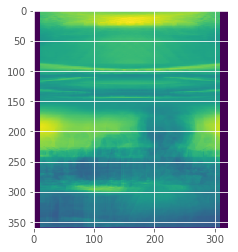

In [66]:
plt.imshow(np.rot90(data.recon_data[100, :, :], 3))

The data looks awful but that's not surprisng as I was just spinning on my chair (packlighting is awful - it probably would work if we didn't have that issue...)!